In [50]:
import pandas as pd

df = pd.read_csv("Telco_Customer_Churn_ISOM835.ipynb.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
df.shape, df.columns

((7043, 21),
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
        'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
       dtype='object'))

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 1. Dataset Overview

This project uses the Telco Customer Churn dataset, which contains customer-level information for a telecommunications company. The dataset includes demographic details, account information, service usage, and billing data for 7,043 customers.

The target variable is **Churn**, which indicates whether a customer discontinued the service. The objective of this analysis is to build predictive models to identify customers at high risk of churn and to extract actionable business insights to improve customer retention.

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## 2. Exploratory Data Analysis (EDA)

The purpose of this exploratory analysis is to understand the structure of the dataset, identify patterns related to customer churn, and uncover insights that will inform feature selection and model development.


# **2.1 Distribution of Customer Churn**

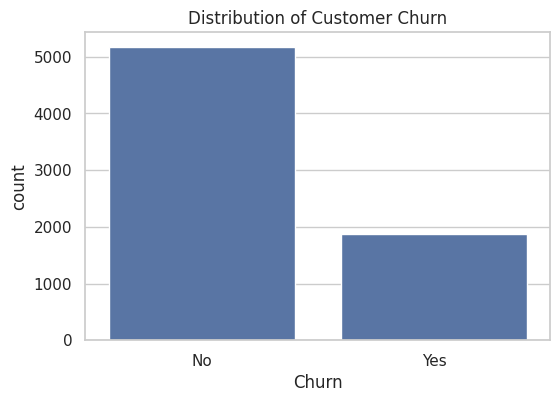

In [54]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Distribution of Customer Churn")
plt.show()

**Insight:**  
The majority of customers in the dataset did not churn, indicating a class imbalance between churned and non-churned customers. This imbalance suggests that relying solely on accuracy as an evaluation metric may be misleading, and highlights the importance of using metrics such as recall, F1-score, and ROC-AUC when evaluating churn prediction models.


# 2.2 Tenure vs **Churn**

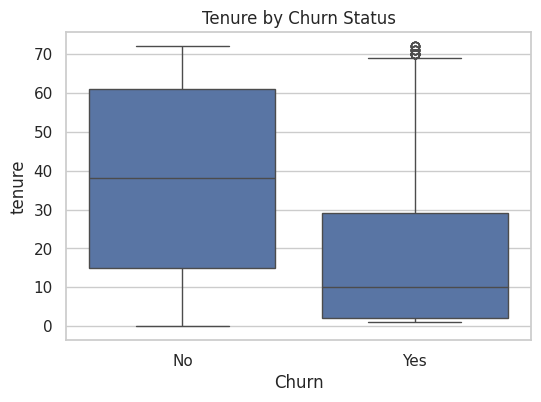

In [55]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure by Churn Status")
plt.show()

**Insight:**  
The boxplot clearly shows that customers who churn have significantly lower tenure compared to customers who remain. The median tenure for churned customers is much lower, indicating that churn is most prevalent during the early stages of the customer lifecycle. This suggests that improving early customer engagement and onboarding may be critical for reducing churn.


# 2.3 Monthly Charges vs **Churn**

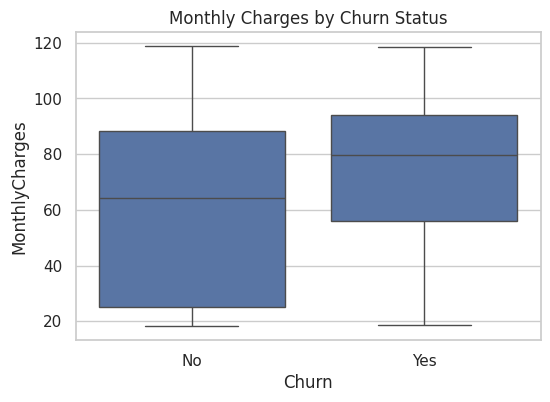

In [56]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn Status")
plt.show()

**Finding:**  
Customers who churn tend to have higher monthly charges compared to customers who remain. The higher median monthly charges among churned customers indicate that pricing and cost sensitivity are important factors influencing churn behavior.


# **2.4 Contract Type vs Churn**

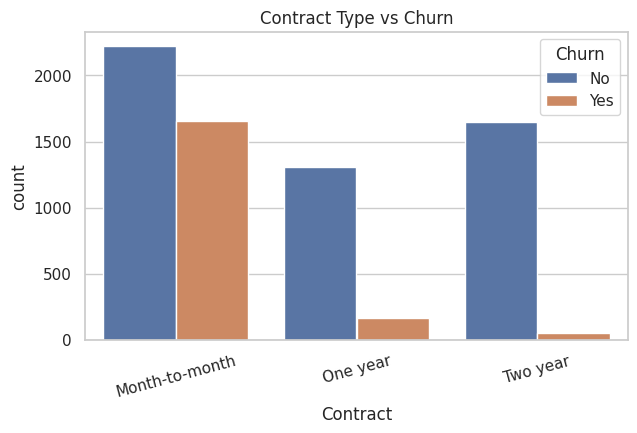

In [57]:
plt.figure(figsize=(7,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=15)
plt.show()

**Insight:**  
Customers on month-to-month contracts exhibit significantly higher churn compared to those on one-year or two-year contracts. In contrast, customers with longer-term contracts show substantially lower churn rates, indicating that contract commitment plays a critical role in customer retention. This suggests that encouraging customers to transition from month-to-month plans to longer-term contracts could be an effective strategy to reduce churn.


# **2.5 Internet Service vs Churn**

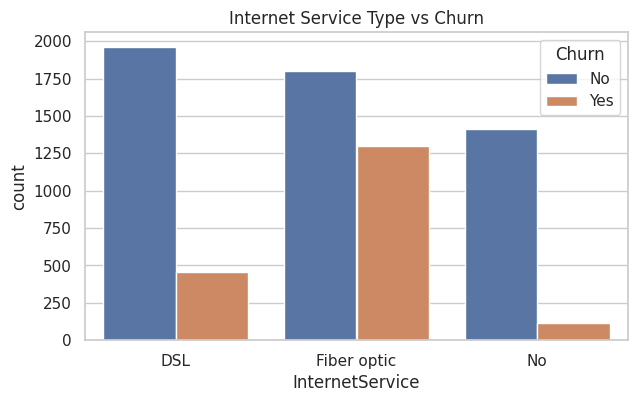

In [58]:
plt.figure(figsize=(7,4))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Internet Service Type vs Churn")
plt.show()

**Finding:**  
Customers using fiber optic internet exhibit significantly higher churn compared to those using DSL or no internet service. This suggests that factors such as pricing, service expectations, or customer experience associated with fiber optic plans may contribute to increased churn.


### 2.6 Correlation Analysis of Key Numeric Features


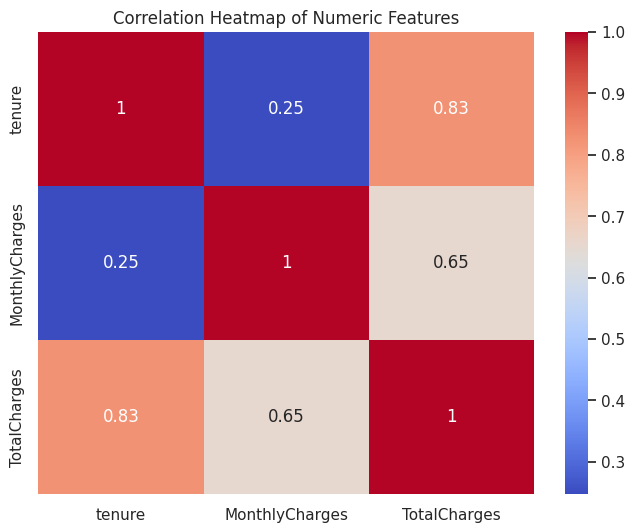

In [59]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

plt.figure(figsize=(8,6))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

**Insight:**  
Tenure shows a strong positive correlation with TotalCharges, indicating that customers who stay longer accumulate higher total charges over time. MonthlyCharges has a moderate positive correlation with TotalCharges, while its relationship with tenure is relatively weak. These patterns suggest that tenure and MonthlyCharges capture different aspects of customer behavior and are both valuable features for churn prediction.


## 3. Data Cleaning and Preprocessing

This section focuses on preparing the dataset for machine learning by handling data quality issues, encoding categorical variables, scaling numerical features, and creating training and testing datasets.


# **3.1 Data Cleaning**

In [60]:
# Drop customerID as it is not predictive
df = df.drop('customerID', axis=1)

# Convert TotalCharges to numeric (some values are spaces)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check missing values
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


# **3.1 Data Cleaning**

In [61]:
# Fill missing TotalCharges with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

/tmp/ipython-input-3266989619.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [62]:
# Fill missing TotalCharges with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

/tmp/ipython-input-3266989619.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


# **3.3 Encode Target Variable**

In [63]:
# Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# **3.3 Define Features and Target**

In [64]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# **3.4 Train-Test Split**

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


# **3.5 ColumnTransformer**

In [66]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Identify column types
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)])


# **3.6 Model 1 — Logistic Regression**

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))])

log_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', LogisticRegression(max_iter=1000))])

### Logistic Regression Model Training

The logistic regression model was trained using a preprocessing pipeline that standardizes numerical features and encodes categorical variables. This approach ensures that all features are appropriately prepared and that data leakage is avoided by applying preprocessing only within the training process.


# **3.7 Model 2 — Random Forest Classifier**

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        class_weight='balanced'))])

rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

### Random Forest Model Training

The Random Forest classifier was trained using the same preprocessing pipeline as Logistic Regression to ensure a fair comparison. By combining multiple decision trees, the Random Forest model is able to capture complex and non-linear relationships between customer attributes and churn behavior. The use of class weighting helps address class imbalance and improves the model’s ability to identify customers at high risk of churn.


## 4. Model Evaluation and Comparison

This section evaluates the performance of the Logistic Regression and Random Forest models using multiple classification metrics to assess their ability to predict customer churn.


# **4.1 Generate Predictions**

In [69]:
# Predictions
y_pred_lr = log_reg_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)

# Probabilities (for ROC-AUC)
y_prob_lr = log_reg_pipeline.predict_proba(X_test)[:, 1]
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]

# **4.2 Classification Metrics**

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred, model_name):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred)}

results = [evaluate_model(y_test, y_pred_lr, 'Logistic Regression'),
    evaluate_model(y_test, y_pred_rf, 'Random Forest')]

import pandas as pd
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.806955,0.660377,0.561497,0.606936
1,Random Forest,0.789922,0.634483,0.491979,0.554217


### Classification Metrics Interpretation

Logistic Regression achieved slightly higher accuracy, recall, and F1-score compared to the Random Forest model, indicating a better overall balance between identifying churned customers and minimizing false predictions. In particular, the higher recall suggests that Logistic Regression is more effective at capturing customers who are likely to churn.

Although Random Forest is capable of modeling complex non-linear relationships, its lower recall in this case indicates that it may miss a greater number of churned customers. Given the business importance of identifying potential churners, Logistic Regression demonstrates stronger performance based on these metrics.


# **4.3** Confusion Matrices

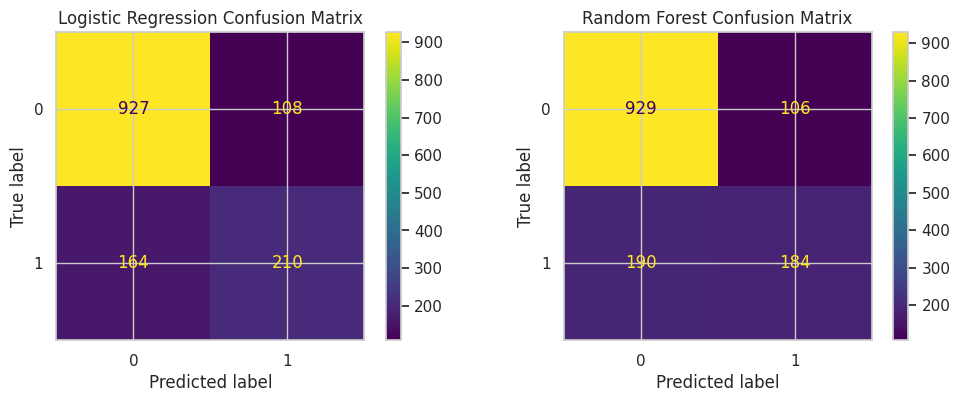

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12,4))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr)).plot(ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot(ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")

plt.show()

### Confusion Matrix Interpretation

The Logistic Regression model correctly identifies a higher number of churned customers compared to the Random Forest model, as indicated by its larger number of true positives. This results in fewer false negatives, which is particularly important in churn prediction where missing a potential churner can lead to lost revenue.

While the Random Forest model performs slightly better at correctly identifying non-churned customers, it misclassifies more churned customers as non-churned. Given the business objective of proactively identifying customers at risk of churn, Logistic Regression demonstrates more favorable performance.


# **4.4 ROC Curve Comparison**

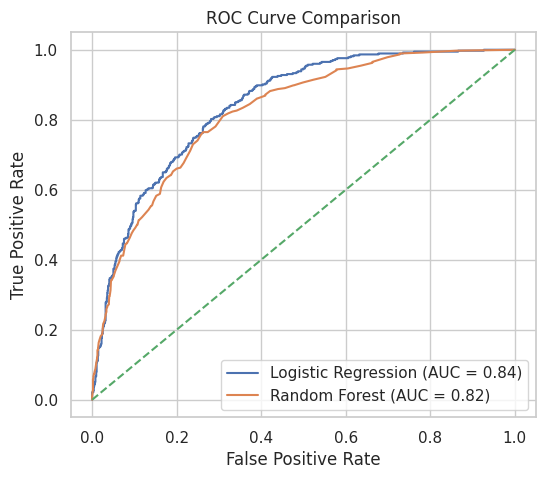

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

### ROC Curve and AUC Interpretation

Both models demonstrate strong discriminative ability, with AUC values well above 0.80. Logistic Regression achieves a slightly higher AUC compared to the Random Forest model, indicating better overall performance in distinguishing between churned and non-churned customers across different classification thresholds.

Given its higher AUC and stronger recall performance observed earlier, Logistic Regression is selected as the preferred model for this churn prediction task.


### 5. Business Insights and Recommendations



The analysis identified several key factors that strongly influence customer churn. Customer tenure emerged as one of the most important predictors, with customers in the early stages of their relationship showing a significantly higher likelihood of churn. This indicates that the initial customer experience and onboarding period are critical for long-term retention.

Contract type was another major driver of churn. Customers on month-to-month contracts exhibited substantially higher churn compared to those on one-year or two-year contracts, suggesting that longer-term commitments help stabilize customer relationships. Additionally, customers with higher monthly charges were more likely to churn, highlighting price sensitivity as a contributing factor.

Based on these findings, the following actionable recommendations are proposed:

1. **Strengthen Early Customer Engagement:**  
   Implement targeted onboarding programs and early engagement initiatives for new customers, particularly during the first few months of service, to reduce early-stage churn.

2. **Promote Long-Term Contracts:**  
   Encourage month-to-month customers to switch to longer-term contracts by offering incentives such as discounts, loyalty rewards, or bundled services.

3. **Address Price Sensitivity:**  
   Identify customers with high monthly charges and provide personalized retention offers, such as flexible pricing plans or value-added services, to reduce cost-related churn risk.

By leveraging these insights, the organization can proactively identify at-risk customers and deploy targeted retention strategies, leading to improved customer lifetime value and reduced revenue loss.


### 6. Ethics and Responsible AI Considerations



While predictive models for customer churn can provide significant business value, their use also raises important ethical and responsible AI considerations. One key concern is the potential for bias in the data. Certain customer attributes, such as senior citizen status or payment methods, may act as proxies for age or income level. If not carefully monitored, the model could disproportionately target specific customer groups, leading to unfair or discriminatory outcomes.

Privacy is another important consideration. Customer churn models rely on sensitive personal and usage data, making it essential to ensure that data is securely stored, accessed only by authorized personnel, and used strictly for legitimate business purposes. Transparency with customers regarding data usage is critical to maintaining trust and regulatory compliance.

From an interpretability perspective, while more complex models can improve predictive performance, they may reduce transparency for non-technical stakeholders. In this project, Logistic Regression was selected as the final model in part due to its interpretability, allowing business users to understand which factors influence churn and why certain customers are flagged as high risk.

To support responsible deployment, churn predictions should be used as decision-support tools rather than fully automated decision-makers. Human oversight should be maintained when designing retention strategies, and regular audits should be conducted to evaluate model fairness and performance over time. By incorporating transparency, fairness, and accountability into the modeling process, the organization can ensure ethical and responsible use of predictive analytics.


# 7. Conclusion & Future **Work**



This project applied the complete predictive analytics workflow to identify customers at risk of churn using the Telco Customer Churn dataset. Through exploratory data analysis, key drivers of churn were identified, including customer tenure, contract type, and monthly charges. Two classification models—Logistic Regression and Random Forest—were developed and evaluated using multiple performance metrics.

Logistic Regression emerged as the preferred model due to its strong recall and ROC-AUC performance, as well as its interpretability, which is critical for business decision-making. The insights generated from this model enable the organization to proactively identify high-risk customers and implement targeted retention strategies.

Despite strong performance, this analysis has limitations. The models do not account for temporal changes in customer behavior, and additional behavioral or usage-based features could further improve prediction accuracy. Future work may include incorporating time-series data, exploring interaction features, and continuously monitoring model performance to ensure fairness and effectiveness over time.


## Executive Snapshot

- **Dataset:** Telco Customer Churn (7,043 customers)
- **Objective:** Predict customer churn and identify key drivers of customer retention
- **Models Used:** Logistic Regression, Random Forest Classifier
- **Final Model Selected:** Logistic Regression
- **Key Insights:** Customers with low tenure, month-to-month contracts, and higher monthly charges are significantly more likely to churn
- **Business Impact:** Enables proactive customer retention strategies and improved customer lifetime value
